## Customer Churn Prediction

Data source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

### Getting Started

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [5]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Preprocessing

In [7]:
df = data.copy()

In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [10]:
df = df.drop('customerID', axis=1)

In [11]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### Encoding

In [12]:
def get_uniques(df, columns):
    return {column: list(df[column].unique()) for column in columns}

In [13]:
def get_categorical_columns(df):
    return [column for column in df.columns if df.dtypes[column] == 'object']

In [14]:
get_uniques(df, get_categorical_columns(df))

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'StreamingMovies': ['No', 'Yes', 'No internet service'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'TotalCharges': ['29.85',
  '1889.5',
  '108.15',
  '1840.75',
  '151.65',
  '820.5',
  '1949.4',
  '301.9',
  '3046.05',
  '3487.95',
  '587.45',
  '326.8',
  '5681.1',
  '5036.3',
  '2686.05',
  '7895.15',
  '1022.95',
  '7382

In [18]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [19]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [20]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [22]:
df.isna().sum().sum()

np.int64(0)

In [23]:
get_uniques(df, get_categorical_columns(df))

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'StreamingMovies': ['No', 'Yes', 'No internet service'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': ['No', 'Yes']}

In [25]:
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
positive_values = ['Male', 'Yes', 'Yes', 'Yes', 'Yes']

ordinal_features = ['Contract', ]
ordinal_orderings = [['Month-to-month', 'One year', 'Two year']]

nominal_features = ['PaymentMethod', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'StreamingMovies', 'TechSupport',\
                   'StreamingTV']
nominal_feature_prefixes = ['PM', 'ML', 'IS', 'OS', 'OB', 'DP', 'SM', 'TS', 'ST']

target = 'Churn'

In [30]:
def binary_encoding(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encoding(df, columns, orderings):
    df = df.copy()
    for column, ordering in zip(columns, orderings):
        df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def nominal_encoding(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix, dtype=int)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [31]:
df = binary_encoding(df, binary_features, positive_values)
df = ordinal_encoding(df, ordinal_features, ordinal_orderings)
df = nominal_encoding(df, nominal_features, nominal_feature_prefixes)

In [32]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PM_Bank transfer (automatic),PM_Credit card (automatic),PM_Electronic check,PM_Mailed check,ML_No,ML_No phone service,ML_Yes,IS_DSL,IS_Fiber optic,IS_No,OS_No,OS_No internet service,OS_Yes,OB_No,OB_No internet service,OB_Yes,DP_No,DP_No internet service,DP_Yes,SM_No,SM_No internet service,SM_Yes,TS_No,TS_No internet service,TS_Yes,ST_No,ST_No internet service,ST_Yes
0,0,0,1,0,1,0,0,1,29.85,29.85,No,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,34,1,1,0,56.95,1889.50,No,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0
2,1,0,0,0,2,1,0,1,53.85,108.15,Yes,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,45,0,1,0,42.30,1840.75,No,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0
4,0,0,0,0,2,1,0,1,70.70,151.65,Yes,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,84.80,1990.50,No,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1
7039,0,0,1,1,72,1,1,1,103.20,7362.90,No,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1
7040,0,0,1,1,11,0,0,1,29.60,346.45,No,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
7041,1,1,1,0,4,1,0,1,74.40,306.60,Yes,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [33]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

#### Splitting and Scaling

In [34]:
y = df['Churn'].copy()
X = df.drop('Churn', axis=1).copy()

In [35]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

### Training

In [37]:
X_train.shape

(4930, 38)

In [38]:
y.sum() / len(y)

np.float64(0.2653698707936959)

In [39]:
inputs = tf.keras.Input(shape=(38, ))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

batch_size = 64
epochs = 100

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - auc: 0.7552 - loss: 0.4987 - val_auc: 0.8198 - val_loss: 0.4532 - learning_rate: 0.0010
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - auc: 0.8358 - loss: 0.4296 - val_auc: 0.8302 - val_loss: 0.4414 - learning_rate: 0.0010
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.8459 - loss: 0.4173 - val_auc: 0.8288 - val_loss: 0.4429 - learning_rate: 0.0010
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - auc: 0.8517 - loss: 0.4105 - val_auc: 0.8301 - val_loss: 0.4413 - learning_rate: 0.0010
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.8550 - loss: 0.4068 - val_auc: 0.8318 - val_loss: 0.4408 - learning_rate: 0.0010
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - auc: 0.8587 - loss: 0.4019 - val_auc: 0.8312 - val_loss: 0.4400 - learning_rate: 0.0010
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - auc: 0.8615 - loss: 0.3982 - val_auc: 0.8290 - val_loss: 0.4461 - learning_rate: 0.0010
Epoch 8/100


### Results

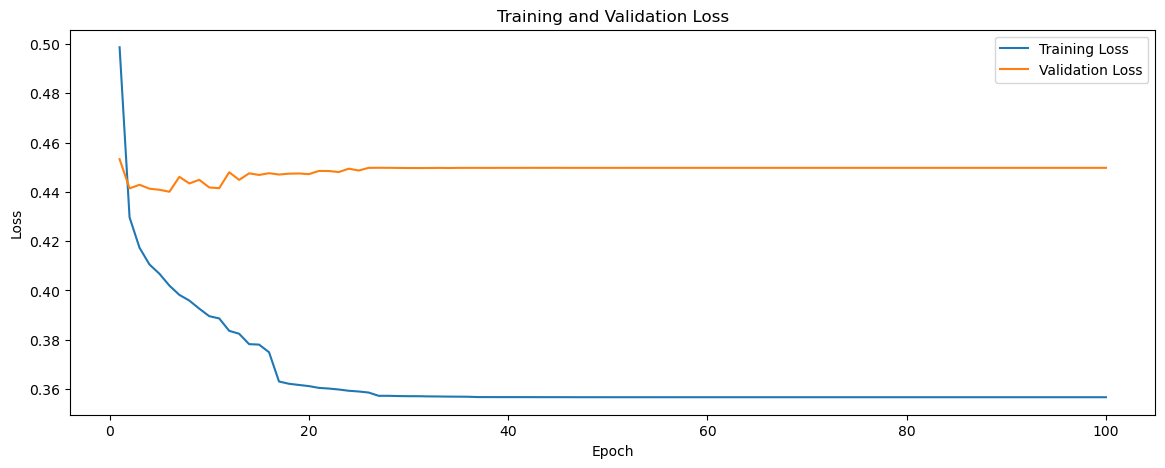

In [40]:
plt.figure(figsize=(14, 5))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [41]:
model.evaluate(X_test, y_test)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.8409 - loss: 0.4214


[0.42136457562446594, 0.8409234285354614]